## Modelo de Regressão Logística - Desenvolvimento

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)

input_path = r'D:\Github\Forked\crypto_technical_analysis\files\crypto_data_with_indicators.parquet'

dados = pd.read_parquet(input_path)

dados.tail(5)

,Stock Splits,Symbol,Open,High,Low,Close,Volume,Dividends,Date,ema_12,ema_26,ema_50,ema_100,ema_200,ema_12_above_ema_26,ema_12_above_ema_50,ema_12_above_ema_100,ema_12_above_ema_200,ema_26_above_ema_12,ema_26_above_ema_50,ema_26_above_ema_100,ema_26_above_ema_200,ema_50_above_ema_12,ema_50_above_ema_26,ema_50_above_ema_100,ema_50_above_ema_200,ema_100_above_ema_12,ema_100_above_ema_26,ema_100_above_ema_50,ema_100_above_ema_200,ema_200_above_ema_12,ema_200_above_ema_26,ema_200_above_ema_50,ema_200_above_ema_100,target_7d,bl_target_10P_7d,bl_target_10N_7d,target_15d,bl_target_10P_15d,bl_target_10N_15d,target_30d,bl_target_10P_30d,bl_target_10N_30d,bl_target_15P_7d,bl_target_15N_7d,bl_target_15P_15d,bl_target_15N_15d,bl_target_15P_30d,bl_target_15N_30d,bl_target_20P_7d,bl_target_20N_7d,bl_target_20P_15d,bl_target_20N_15d,bl_target_20P_30d,bl_target_20N_30d,bl_target_25P_7d,bl_target_25N_7d,bl_target_25P_15d,bl_target_25N_15d,bl_target_25P_30d,bl_target_25N_30d,vl_adx,vl_dmp,vl_dmn,nm_adx_trend,rsi,nm_rsi_trend,vl_macd,vl_macd_signal,vl_macd_delta,qt_days_macd_delta_positive
6386,0.0,SOL-USD,182.771591,184.180130,176.022430,179.107193,2.766173e+09,0.0,2024-07-29 21:00:00-03:00,175.967720,166.306279,159.596819,154.004137,138.234866,True,True,True,True,False,True,True,True,False,False,True,True,False,False,False,True,False,False,False,False,NaN,0,0,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29.236717,29.164913,15.771304,2. Strong Trend,59.831584,rsi_51_to_60,9.661441,8.769089,0.892353,34
6387,0.0,SOL-USD,179.108047,184.179443,171.819199,171.826157,3.055204e+09,0.0,2024-07-30 21:00:00-03:00,175.330557,166.715159,160.076400,154.357048,138.569107,True,True,True,True,False,True,True,True,False,False,True,True,False,False,False,True,False,False,False,False,NaN,0,0,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28.630609,26.535569,17.415247,2. Strong Trend,54.008379,rsi_51_to_60,8.615398,8.738350,-0.122953,0
6388,0.0,SOL-USD,171.825668,172.689804,157.988388,167.672119,4.402828e+09,0.0,2024-07-31 21:00:00-03:00,174.152336,166.786045,160.374272,154.620713,138.858689,True,True,True,True,False,True,True,True,False,False,True,True,False,False,False,True,False,False,False,False,NaN,0,0,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26.812789,23.788494,25.351711,2. Strong Trend,50.960967,None,7.366291,8.463938,-1.097648,0
6389,0.0,SOL-USD,167.660538,169.043961,150.084991,152.638229,4.507521e+09,0.0,2024-08-01 21:00:00-03:00,170.842473,165.738059,160.070898,154.581456,138.995799,True,True,True,True,False,True,True,True,False,False,True,True,False,False,False,True,False,False,False,False,NaN,0,0,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25.876603,20.798234,27.405069,2. Strong Trend,41.774182,rsi_41_to_50,5.104414,7.792034,-2.687619,0
6390,0.0,SOL-USD,152.627853,153.771561,140.524582,141.741211,3.916663e+09,0.0,2024-08-02 21:00:00-03:00,166.365356,163.960514,159.352086,154.327194,139.023117,True,True,True,True,False,True,True,True,False,False,True,True,False,False,False,True,False,False,False,False,NaN,0,0,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25.771903,19.000998,31.273379,2. Strong Trend,36.620983,rsi_31_to_40,2.404841,6.714595,-4.309754,0


In [2]:
# Filter data for study
# symbols_filter = ['BTC-USD', 'ETH-USD', 'SOL-USD', 'LTC-USD', 'DOGE-USD', 'MATIC-USD', 'LINK-USD', 'NEAR-USD']
symbols_filter = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'XRP-USD', 'SOL-USD', 'ADA-USD', 'DOGE-USD', 'TON-USD', 'TRX-USD', 'AVAX-USD', 'SHIB-USD', 'DOT-USD', 'LINK-USD', 'BCH-USD', 'MATIC-USD', 'NEAR-USD', 'LTC-USD', 'UNI-USD', 'XMR-USD', 'XLM-USD', 'APT-USD', 'RNDR-USD', 'HBAR-USD']

dados = dados[dados['Symbol'].isin(symbols_filter)]

In [3]:
def data_clean(dados:pd.DataFrame, target_list:list, data_return:str):
    # Removing NA
    dados_treat = dados.dropna()

    # Substituindo valores infinitos por NaN
    dados_treat.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Removendo linhas com valores NaN
    dados_treat.dropna(inplace=True)

    # Removing columns that won't be use in the model
    # removing_cols = ['Symbol', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
    removing_cols = ['Date', 'Symbol']

    # Define the target in a list of target (for futher iteration)
    dados_y = dados_treat[target_list]

    # Removing target from base to avoid data leakage
    dados_x = dados_treat.drop(dados_treat[target_list], axis=1)
    dados_x = dados_x.drop(dados_x[removing_cols], axis=1)

    if data_return == 'Y':
        return dados_y
    else:
        return dados_x

In [4]:
def get_target(dados_y:pd.DataFrame, col_target:str):
    return dados_y[col_target]

In [5]:


target_list_bol =   [
    # boleanos
    'bl_target_10_7d','bl_target_15_7d','bl_target_20_7d','bl_target_25_7d',
    'bl_target_10_15d','bl_target_15_15d','bl_target_20_15d','bl_target_25_15d', 
    'bl_target_10_30d','bl_target_15_30d','bl_target_20_30d','bl_target_25_30d' 
]

target_list_val =   [
    # percentual
    'target_10_7d','target_15_7d','target_20_7d','target_25_7d',
    'target_10_15d','target_15_15d','target_20_15d','target_25_15d', 
    'target_10_30d','target_15_30d','target_20_30d','target_25_30d', 
]

remove_target_list = target_list_bol + target_list_val

dados_x = data_clean(dados, remove_target_list, 'X')
dados_y_all = data_clean(dados, remove_target_list, 'Y')

C:\Users\mathe\AppData\Local\Temp\ipykernel_3140\1057834492.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_treat.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\mathe\AppData\Local\Temp\ipykernel_3140\1057834492.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_treat.dropna(inplace=True)
C:\Users\mathe\AppData\Local\Temp\ipykernel_3140\1057834492.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_tre

In [6]:
dados_y = get_target(dados_y_all, target_list_bol[0])

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def split_data(dados_x:pd.DataFrame, dados_y:pd.DataFrame, test_size:float=0.3):

    # Getting dummies values. This way we can use categorical columns to train the models
    dummies = pd.get_dummies(dados_x)

    # Transform the data in numpy arrays
    X = np.array(dummies.values)
    y = np.array(dados_y.values)

    # This function returns X_train, X_test, y_train, y_test, in this order.
    # See below an example of the return 
    # X_train, X_test, y_train, y_test = split_data(dados_x, dados_y, 0.3)

    return train_test_split(X, y, test_size=test_size, random_state=45)

X_train, X_test, y_train, y_test = split_data(dados_x, dados_y, 0.3)

In [8]:
# Verificando o desbalanceamento de classes

# Supondo que 'y' seja o vetor de rótulos
print(pd.Series(y_train).value_counts(normalize=True))

0    0.813054
1    0.186946
Name: proportion, dtype: float64


In [9]:
# Balanceando as classes 
def balance_sample(X_train, y_train, type):

    from imblearn.under_sampling import RandomUnderSampler # pip install imblearn
    from imblearn.over_sampling import SMOTE

    # Reduzir amostra
    if type == 1:
        undersampler = RandomUnderSampler(random_state=42)
        return undersampler.fit_resample(X_train, y_train)

    # Aumentar amostra
    if type == 2:
        smote = SMOTE(random_state=42)
        return smote.fit_resample(X_train, y_train)
    
    # Sem mudanças
    if type == 0:
        return X_train, y_train   

In [10]:
# Rodar apenas se necessario fazer o balanceamento 
X_train, y_train = balance_sample(X_train, y_train, 1)

In [11]:
# Contar os valores 1
count_1 = np.count_nonzero(y_train == 1)

# Contar os valores 0
count_0 = np.count_nonzero(y_train == 0)

# Contar os valores 1
count_1t = np.count_nonzero(y_test == 1)

# Contar os valores 0
count_0t = np.count_nonzero(y_test == 0)

print(count_1, count_0)
print(count_1t, count_0t)

4388 4388
1909 8151


In [12]:
def norm_scale(X_norm_scale):

    # normalizando e padronizando os dados
    # MinMaxScaler é usado para normalizar as variáveis, colocando em uma mesma escala,
    # e StandardScaler é usado para padronizar, fazendo com que a média seja 0 e o desvio padrão seja 1
    from sklearn.preprocessing import MinMaxScaler, StandardScaler

    # Padronizando
    scaler = StandardScaler()
    scaler.fit(X_norm_scale)
    standardized_data = scaler.transform(X_norm_scale)
    # print(standardized_data.shape)

    # normalizando
    scaler = MinMaxScaler()
    scaler.fit(standardized_data)
    normalized_data = scaler.transform(standardized_data)
    # print(normalized_data)
    
    return normalized_data

In [13]:
#Antes da normalização
X_train

array([[4.074631214141846, 4.1127119064331055, 4.063875198364258, ...,
        False, False, False],
       [0.8147090077400208, 0.8336780071258545, 0.8102560043334961, ...,
        False, False, False],
       [1003.9636840820312, 1024.783447265625, 833.9827270507812, ...,
        False, False, False],
       ...,
       [0.02814199961721897, 0.028192000463604927, 0.02727999910712242,
        ..., False, False, False],
       [7.490935802459717, 7.494194984436035, 6.583508014678955, ...,
        False, False, False],
       [0.47177600860595703, 0.4825170040130615, 0.42910298705101013,
        ..., False, False, False]], dtype=object)

In [14]:
# # Normalizando datasets de treino e teste
X_train = norm_scale(X_train)
X_test = norm_scale(X_test)

In [15]:
# Depois da normalização
X_train

array([[5.70331824e-05, 5.71634220e-05, 5.87339807e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.14035286e-05, 1.15873942e-05, 1.17103314e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.40526406e-02, 1.42436949e-02, 1.20533193e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.93824098e-07, 3.91763543e-07, 3.94197942e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.04851745e-04, 1.04163414e-04, 9.51495299e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.60344045e-06, 6.70652868e-06, 6.20163333e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [16]:
# Criando o modelo
model = LogisticRegression(class_weight='balanced',random_state=0,max_iter=1000)

# Treinando o modelo
model.fit(X_train, y_train)

clf = LogisticRegression(random_state=45,max_iter=1000).fit(X_train, y_train)

In [52]:
def eval_model(classifier, X_test, y_test):

    from sklearn.metrics import confusion_matrix
    from sklearn import metrics
    from sklearn.metrics import roc_auc_score

    # Fazendo a previsão das classes
    y_pred2 = classifier.predict(X_test)

    confusion_matrix_cal = confusion_matrix(y_test,y_pred2)

    # Avaliando o erro
    print('Confusion Matrix')
    print(confusion_matrix_cal)

    #Fazendo a previsão das probabilidades
    proba = classifier.predict_proba(X_test)

    # Probabilidade de ser o target:
    proba_target = proba[:,1] # array

    # Calcular AUC ROC
    auc = roc_auc_score(y_test, proba_target)
    print("AUC ROC:", auc)

    # Avaliando o modelo 
    # score = model.score(X_test, y_test)
    score = metrics.accuracy_score(y_test, y_pred2)

    # Percentagem de acerto
    print('Acurácia:', score)

    return confusion_matrix_cal, auc, score

In [54]:
# Com a função de balanceamento de classe tipo 1
eval_model(clf, X_test, y_test)

Confusion Matrix
[[5461 2690]
 [ 862 1047]]
AUC ROC: 0.6524478802055931
Acurácia: 0.6469184890656063


(array([[5461, 2690],
        [ 862, 1047]], dtype=int64),
 0.6524478802055931,
 0.6469184890656063)

In [58]:
matrix, auc, score_cal = eval_model(clf, X_test, y_test)

Confusion Matrix
[[5461 2690]
 [ 862 1047]]
AUC ROC: 0.6524478802055931
Acurácia: 0.6469184890656063


In [53]:
# Com a função de balanceamento de classe tipo 2
eval_model(clf, X_test, y_test)

Confusion Matrix
[[5218 3633]
 [ 681 1188]]
Acurácia: 0.5975746268656716


In [42]:
# Sem a função de balanceamento de classes
eval_model(clf, X_test, y_test)

Confusion Matrix
[[8811   40]
 [1849   20]]
Acurácia: 0.8237873134328358


In [ ]:
matrix, auc, score_cal = eval_model(clf, X_test, y_test)

In [72]:
# Importar pandas e IPython display
import pandas as pd
from IPython.display import display

def build_log_model(name_model, eval_model_tuple, version): 

    from datetime import datetime

    matrix, auc, score_cal = eval_model_tuple
    
    # Exemplo de dados
    data = {
        'name': [name_model],
        'version': [version],
        'date_add': datetime.today().strftime('%Y-%m-%d'),
        'true_negative': [matrix[0,0]],
        'false_positive': [matrix[0,1]],
        'false_negative': [matrix[1,0]],
        'true_positive':[ matrix[1,1]],
        'accuracy': [score_cal],
        'precision': [matrix[1,1] / (matrix[1,1] + matrix[0,1])],   # Proporção de previsões positivas corretas em relação ao total de previsões positivas.
        'recall': [matrix[1,1] / (matrix[1,1] + matrix[1,0])], #Revocação (Recall) ou Sensibilidade (Sensitivity): Proporção de casos positivos corretamente identificados.
        'auc_roc': [auc]
    }

    df = pd.DataFrame(data)

    df['f1_score'] = 2 * ((df['precision'] * df['recall']) / (df['precision'] + df['recall'])) # F1 Score: Média harmônica da precisão e da revocação, usada para balancear os trade-offs entre essas duas métricas.

    # Salvar o DataFrame em um arquivo CSV
    # df.to_csv(f'models/accuracy/log_models.csv', index=False)
    # df.to_csv(f'D:/Github/Forked/crypto_technical_analysis/models/accuracy/log_models.csv', index=False)

    df.to_csv(f'D:/Github/Forked/crypto_technical_analysis/models/accuracy/log_models.csv', mode='a', index=False, header=False)

    return df


In [2]:
import pandas as pd
pd.read_csv(f'D:/Github/Forked/crypto_technical_analysis/models/accuracy/log_models.csv')

,name_file,name_model,target,version,date_add,true_negative,false_positive,false_negative,true_positive,accuracy,precision,recall,auc_roc,f1_score
0,logistic_regression_model_v1-2_bl_target_10_7d,lr_pb_10_7d,bl_target_10_7d,v1-2,2024-07-24,81666,30547,13695,13411,0.682441,0.305087,0.494761,0.656523,0.377434
1,logistic_regression_model_v1-2_bl_target_15_7d,lr_pb_15_7d,bl_target_15_7d,v1-2,2024-07-24,79766,41277,7201,11075,0.652036,0.211549,0.605986,0.678573,0.313615
2,logistic_regression_model_v1-2_bl_target_20_7d,lr_pb_20_7d,bl_target_20_7d,v1-2,2024-07-24,86007,40569,4922,7821,0.673476,0.161624,0.613749,0.694957,0.255868


In [73]:
build_log_model('test2', eval_model(clf, X_test, y_test), 'v0')

Confusion Matrix
[[5461 2690]
 [ 862 1047]]
AUC ROC: 0.6524478802055931
Acurácia: 0.6469184890656063


,name,version,date_add,true_negative,false_positive,false_negative,true_positive,accuracy,precision,recall,auc_roc,f1_score
0,test2,v0,2024-07-23,5461,2690,862,1047,0.646918,0.280171,0.548455,0.652448,0.370882


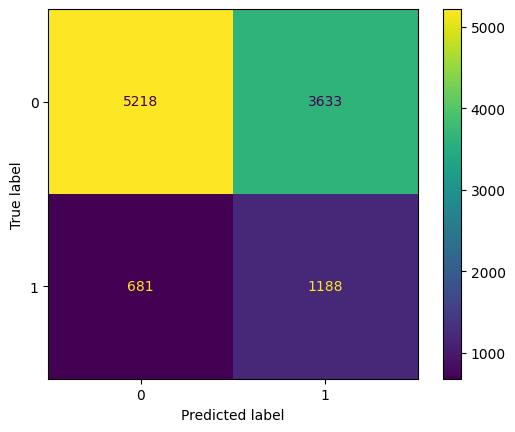

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

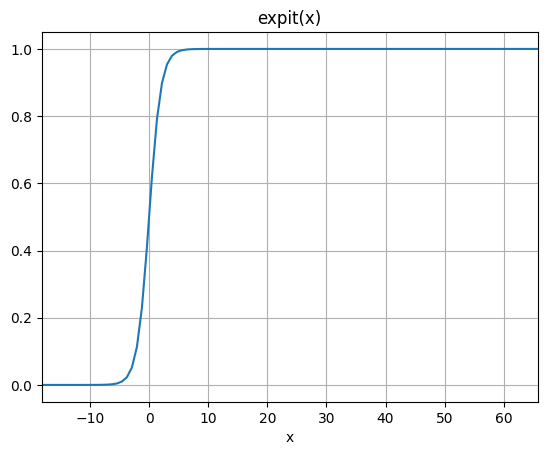

In [65]:
# Visualizando o gráfico

import matplotlib.pyplot as plt
from scipy.special import expit

x = np.linspace(X_train.min(), X_train.max(), 100)
y = expit(x)
plt.plot(x, y)
plt.grid()
plt.xlim(X_train.min(), X_train.max())
plt.xlabel('x')
plt.title('expit(x)')
plt.show()

In [236]:
def save_model(classifier, name_model:str):
    # Lib to save the model in a compressed way
    import joblib

    # Save the model that has been trained
    joblib.dump(classifier, name_model + '.joblib')

    print(f'Modelo savo no diretório atual com o nome de {name_model}.joblib')

In [237]:
def load_model(name_model:str):
    # Lib to save the model in a compressed way
    import joblib

    # Load the trained model
    clf_loaded = joblib.load(name_model + '.joblib')

    return clf_loaded

In [46]:
nome_modelo = 'logistic_regression_model_bl_target_10_7d'
save_model(clf, nome_modelo)

Modelo savo no diretório atual com o nome de logistic_regression_model_bl_target_10_7d.joblib
